# Problem Statement 

*  We need to predict  the chance of admission based on he student various scores .

--> __Feature or independent Variables 
- GRE Score
- TOEFL Score
- SOP 
- LOR
- CGPA
- Research

-->__Label/Target
- Chance of Admission

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .


https://scikit-learn.org/stable/index.html


In [13]:
#Lets Start with importing necessary libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv("https://raw.githubusercontent.com/s4sauravv/Datasets/main/Admission_Prediction.csv")

In [15]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


- Graduate Record Examination, is a standardized test commonly required for admission into graduate programs worldwide.
-  Test of English as a Foreign Language, measures your ability to use and understand English at the university level. 

In [16]:
data.shape

(500, 9)

In [17]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
#Fill the null values.
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']=data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [19]:
#Verify if Nan's filled 
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now , The data looks good and there are no missing values , also the first column is just serial number , so we dont  need that column . Lets drop it form the data and make it more clean. 

In [20]:
del data['Serial No.']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
#Other method to drop
data=data.drop(columns=['Serial No.'])

Lets visualize the data and analyze the relationship between independent and dependent variables


--> * Continuoues Data always form a normal distribution *

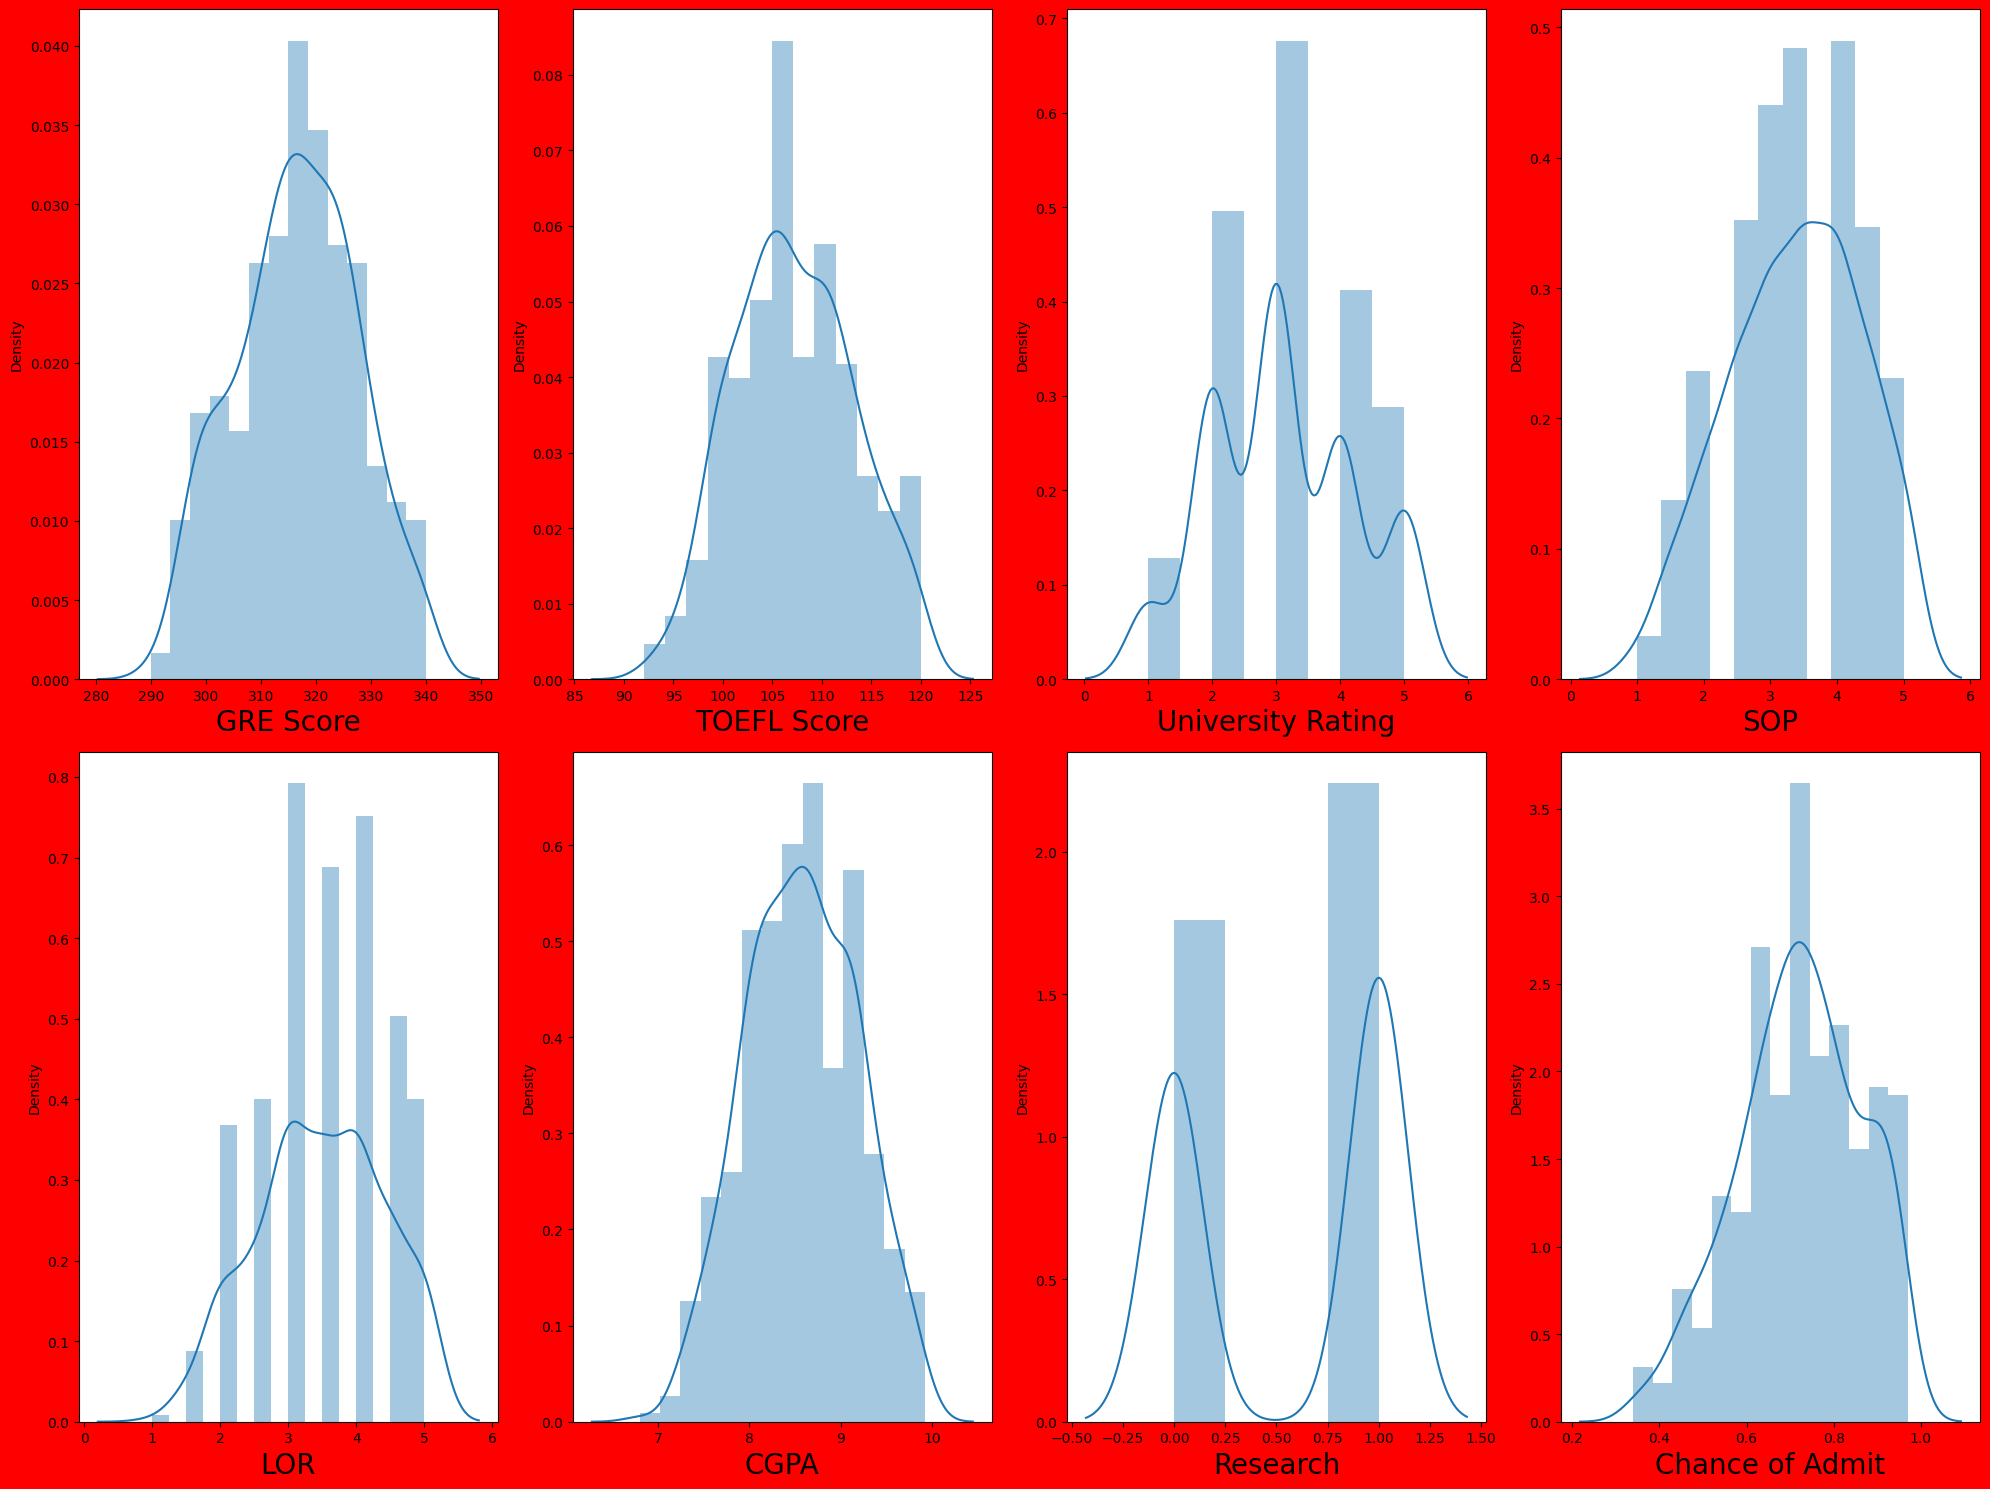

In [21]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

The data distribution looks decent enough and there doesnot sems to by any skeweness. 



Great lets go ahead .Lets observe the relationship between indipendent and dependent variables.

In [22]:
#Divide dataset into Features and label
y=data['Chance of Admit']
x=data.drop(columns=['Chance of Admit'])


#First we need to sepatrate features and labels so in y am 
# keeping label and in x  i am dropping Chance of Admit

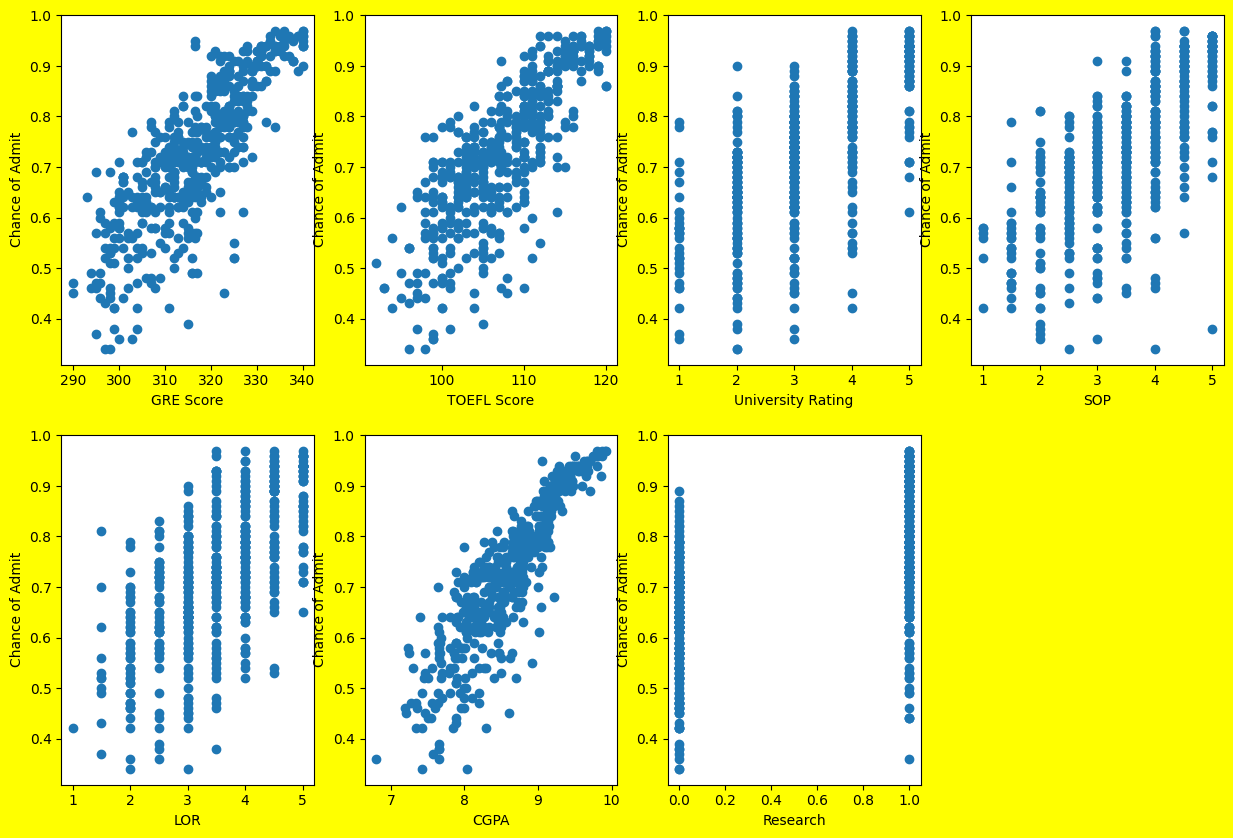

In [23]:
#Visualizing  relationship

plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column , fontsize=10)
        plt.ylabel('Chance of Admit',fontsize=10)
    plotnumber +=1
plt.show()

In [24]:
#We have check only there is relationship or not  , dont worry about there us less relationship.




In [25]:
# Great , The relationship between the dependent variable and independent varible look fairly linear
# Thus , our linearly assumption is satisfied.

Standard Scaler - We are going to do our columns to unit less , and then we are going to standadize  this data then we called a standard scaler .

Suppose we have a different different unit in features then we have to remove all unit and standardize the data..

Example  -- > I have Four Friends  and  all friends are equally knowledgeble and one friends in very close to me .then i cannot listen him only remaining 3 are eqaully knowlegeble  . i have to listen to all my four friends . i cannot biased .i have to listen all my friends .


Biased- We always try to listen one guy.



Similarly you have to give importance to all the features equal amount of impotance . we should give for that we are going to bring  down this number into a similar scaler for that reason we are apply standard scaler



* And we are going to apply standard scaler only in feature *


fit_transform()--> Use Some Formula and it will transform to the its standardized data. means it will going to transfer to new number .(Z distrubition formula is  used)

In [26]:
#Data Scaling Fomula z =(x-mean)/std 
scaler =StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

lets Go ahead and use linear regression and see hoW good it fit our data . But first lets split our data in train and test

# Train Test Split - 

The client says, "I only have this much data (1.2 million). Whatever I have, I am giving to you. So, whatever model you are going to build, you have to do it using this data that I am providing. I don’t have anything extra. Basically, I will give you everything I have." So, I need to build a model. In order to build a model, like in the previous example, we built a linear regression model and then evaluated it using some metrics to check how good the model is. Remember that we trained our model and then checked its performance and confidence.

So, I have to build my model, train it on the given dataset, and also test it. Because I cannot just build a model and hand it over to the client without testing (He laughs at you). He will ask, "Did you test it? Is it working fine? How is the performance? What is the accuracy of the model? What is the confidence of the model? What is the $R^2$ value?" He will start asking all these questions. How are we going to get that? How are we going to evaluate the model's accuracy? How are we going to test it?




Example 2: Suppose you are an engineering student and you study daily throughout the year. Then, the college wants to test you. How is the professor going to test you? By giving you some questions, he will be able to assess how well you have learned. You will then show your performance in terms of the percentage of marks. For this, they will conduct a test, and the questions will come from within the syllabus.

Your entire syllabus is like your dataset, from which you learn all the answers and get trained.

The professors will test you with some questions, so we need both training data and test data.




--> Training is for learning Purpose


--> Test is for checking Purpose 



For that we need the whole dataset i need to split into train and test that is basically train test split.




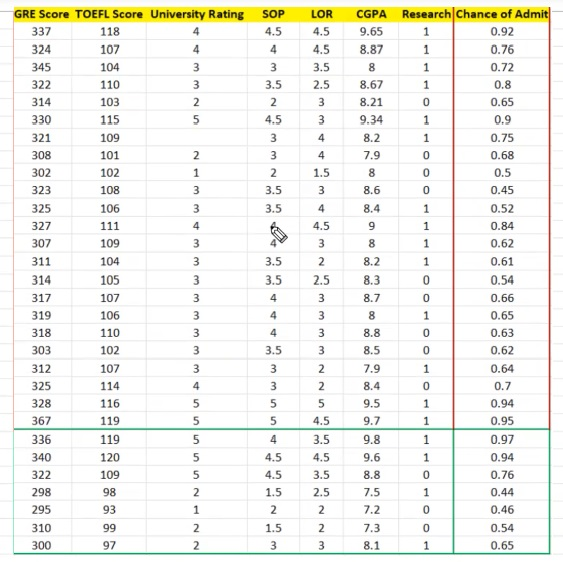






So, let's take an academic example: When I am teaching you in college, I provide both the questions and the answers to help you learn. This way, you are trained with both the questions and the solutions.



However, when I am testing you, I only give you the questions and not the answers. I will hide the answers from you.



During a test, I will give you questions, and the model you’ve learned will be used to predict the answers or labels.






# How can we check it is Correct or Not


Compare the predicted answers with the hidden or actual answers. This is why we split the data into four parts, which is the exact same concept used here.

In every time of supervised machine learning, we use train_test_split from sklearn.model_selection.
   
   

# Split data into train and test  Model, will be built on Training data and tested on test data.

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()
#Formula is = x_train,x_test,y_train,y_test = train_test_split(x,y,test_size,random_state)

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model Instantiating and Training 

In [29]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [30]:
#Predict the chance of admission give feature
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [31]:
#Since we vahe already fit the scaler . you can tranform the data .
print("Chance of Admission is : ",regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82445851]


When we are learning ,our model was learning , How did it learns it learned on scaled data. So basically we converts out data to scaled data . when we have to scale the data . we only use scaler.transform.

# You can save the model and later you can use it for prediction

In [32]:
#Sac=ving the model to the local file system 
pickle.dump(regression,open('Suarv_file','wb'))

#They Save in bit wise 

# How to open Model



In [33]:
import pickle
lin_model=pickle.load(open('Suarv_file','rb'))

In [34]:
lin_model

LinearRegression()

In [35]:
a=lin_model.predict([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])
print(a)

[0.82445851]


# Prediction using the saved model.

In [36]:
#Prediction using the saved model.

loaded_model=pickle.load(open('Suarv_file','rb'))
a=loaded_model.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]]))
a

array([0.82445851])

In [37]:
#Lets try in new window with only pickle model

scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])

array([[ 0.94125895,  0.96145116,  0.78200955,  1.13735981,  1.09894429,
         0.76721964, -1.12815215]])

#  What we did lets Summarize this.



- We Observed the data , based on observation , we will find Nan Value



- Check the data visualization



- We check the relatioship



- We Found relationship is good and distributed



- we have stadardizing the data using standard scaler 



 - Dataset into train test split 



- we have trained the model (using fit()) by passing (x_train,y_train)



- then we predict



- Then we stored model using pickle


- We save the model using pickle


- Then we also tested using pickle load

# Now its time to check how good in our model.

Lets check how well model fits on train data.

In [38]:
#Adjusted R2
regression.score(x_train,y_train)

#Training Score 
# So that is how i am going to check how good my model understood the training data.

0.82855357382842

In [39]:
#How Well my model will understand testing data.
# Lets check how well model fits the test data
regression.score(x_test,y_test)

#Testing Score

0.7928310580010802

Question: Why will your test score be lower than your training score?

Answer: The training score is usually higher because the model has already seen the training data and essentially memorizes it. Since the model is exposed to the training data, it learns patterns specific to that data, resulting in a higher score. In contrast, the test data is new to the model; it has never seen it before. This unfamiliarity typically leads to a lower score on the test data compared to the training data.

# Lets Plot and Visualize

Now i wanted to test it , Now i am going to pass only x_test to regression model and it is going to predict.
 
 and i also have actual label
 
 
 then i will compare predicted data to actual data .
 
 
 Whatever the result am going to get its my model Confidence / How well my model will perform.

In [40]:
y_pred =(regression.predict(x_test))
y_pred



array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

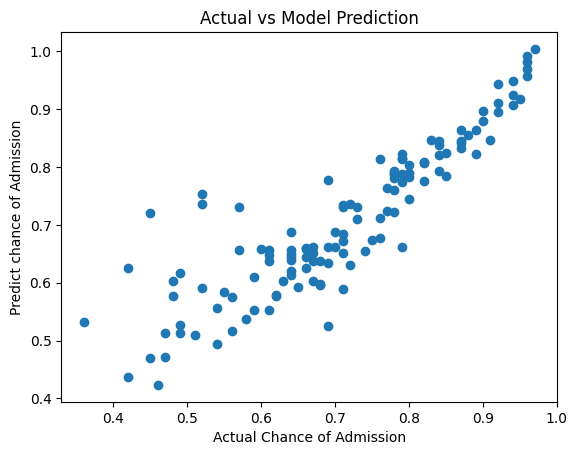

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predict chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

# Model Evaluation - Understanding the Metrics

### Mean Absolute Error (MAE): This shows the average error made by the model. You calculate it by taking the absolute difference between predicted and actual values for every data point and then finding the average of those differences.

### Mean Squared Error (MSE): Similar to MAE, but it squares the errors before averaging. This means larger errors have a bigger impact on the final value. MSE is often used even though it is harder to interpret because the results are not in the original units. It's popular because it emphasizes larger errors more, which can be useful if those errors are significant.

### Root Mean Squared Error (RMSE): This is the most popular metric. It's similar to MSE, but by taking the square root of the result, it converts the error back into the original units of the data, making it easier to understand. RMSE is often recommended as the primary metric for evaluating model performance.

When clients ask, "Tell me in a simple number how much error your model is going to make," they are looking for an overall measure of error across all records in your test data, not individual errors.



Error = Residual: Lower errors mean better results.

In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [56]:
y_pred=regression.predict(x_test)

In [57]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04421359936541997

In [58]:
#MSE
mean_squared_error(y_test,y_pred)

0.004309172332351597

In [60]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485888

#  You Have Sucessfully Completed Building Linear Regression Model

Now let's check if our model is overfitting the data using regularization.

Let's see if our model is overfitting our training data.

### Overfitting:
Usually, what happens is that whenever your model gives good accuracy, good performance, or very low MAE, MSE, or RMSE, we often look at the model suspiciously. We start doubting the model, and the client might also start doubting it, saying, "Hey, this model is performing wonderfully, but somehow I feel it might be overfitting."

For example, imagine I give you 100 questions with their answers and ask you to study them. You will go through these questions and answers, study them, learn them, and understand everything. You might know everything about these 100 questions, maybe even up to 100%. Someone else might learn only 80%. What I'm trying to say is that if I give you a study guide with questions and answers and then conduct an exam where 90% of the questions come directly from that guide, it means you will score high because you know everything. You will definitely get higher marks.

This also happens in real life; sometimes, we get an exam where we already know everything. It happens.

Overfitting means that your model has seen the training data and the test dataset also contains similar data to what the model has seen before. Just like if you learned all the questions and answers and the same questions appeared again. Similarly, if our model has learned all the data, there is a chance that similar data can appear in the test dataset as well. In this case, the model will perform better, but we have no clue if similar data will be in the test dataset. We suspect there is a chance that the model is overfitting.

When you train a model, if your training accuracy is high, but the test performance is low, this is known as overfitting.

# Regularization


If our model ,if you think that your model is overfitted that we are going to regularize it will try  to restrict our model to avoid that overfitting.


--> When we use regression models to train some data , there is a good chance that the model will overfit the given training dataset , regularization helps  sort this overfitting problem by restricting the degrees of freedom of a five equation i.e simply reducing the numbers of degree of polynomial function by reducing  their corresponding weight .


--> In linear equation, we do not want huge weight / coefficient  as a small change in weight can make a large difference for the dependent variables (y) . so regularization



Contraints the weight of such feature to avoid overfitting



To regularize the model a shrinkage penalty is added to the cost fucntion let see different types of regularization in regression.




- LASSO



- Ridge



- Elestic Net

In [61]:
#Continue In Next Lecture

In [43]:
#AI Engineer - Saurav
#Date - 2 may 2024
#Time - 4:12 PM